In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/thisismetis/sf20_ds18/master/pairs/cereal/cereal.csv?token=ADA5PK7RWPBIIL5MTD6SBHS7DNEBK',sep=',')

In [8]:
df2 = df.copy()

In [9]:
df2.loc[df.sodium >= 200, 'fat'] = 100

In [11]:
df2.loc[df.sodium >= 200, ['fat','calories']] = 150

In [12]:
df2

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,saltiness
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Medium
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Very low
2,All-Bran,K,C,150,4,150,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Very High
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Medium
4,Almond Delight,R,C,150,2,150,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,150,2,150,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,High
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,Medium
74,Wheat Chex,R,C,150,3,150,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,High
75,Wheaties,G,C,150,3,150,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,High


In [14]:
df2.loc[df.sugars < 5, ['weight', 'cups']] = 5

In [30]:
df2.rating.std()

14.04728874373522

In [31]:
df2.rating.median()

40.400208

(array([ 6., 14., 22., 11., 12.,  6.,  3.,  2.,  0.,  1.]),
 array([18.042851 , 25.6090571, 33.1752632, 40.7414693, 48.3076754,
        55.8738815, 63.4400876, 71.0062937, 78.5724998, 86.1387059,
        93.704912 ]),
 <a list of 10 Patch objects>)

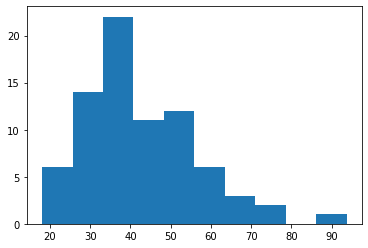

In [27]:
plt.hist(df2.rating)

In [28]:
df2['logic'] = np.where(df2.rating > 70, 'high', 'low')

In [32]:
df2.logic.value_counts()

low     74
high     3
Name: logic, dtype: int64

In [4]:
codes, uniques = pd.factorize(df.mfr)

In [5]:
df['saltiness'] = pd.cut(df.sodium,5,labels=['Very low','Low','Medium','High','Very High'])

In [6]:
df.saltiness

0        Medium
1      Very low
2     Very High
3        Medium
4          High
        ...    
72         High
73       Medium
74         High
75         High
76         High
Name: saltiness, Length: 77, dtype: category
Categories (5, object): [Very low < Low < Medium < High < Very High]

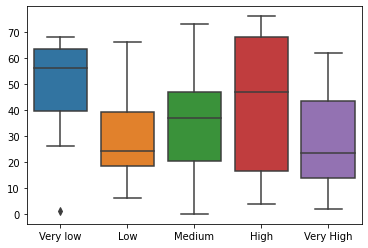

In [37]:
sns.boxplot(x=df.saltiness.values,y=range(0,len(df.saltiness)))

In [20]:
df.set_index('mfr')

,name,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,saltiness
mfr,,,,,,,,,,,,,,,,
N,100% Bran,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Medium
Q,100% Natural Bran,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Very low
K,All-Bran,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Very High
K,All-Bran with Extra Fiber,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Medium
R,Almond Delight,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G,Triples,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,High
G,Trix,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,Medium
R,Wheat Chex,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,High


In [15]:
codes

array([0, 1, 2, 2, 3, 4, 2, 4, 3, 5, 1, 4, 4, 4, 4, 3, 2, 2, 4, 2, 0, 2,
       4, 3, 2, 2, 2, 5, 2, 5, 5, 4, 5, 5, 5, 1, 4, 5, 2, 2, 4, 1, 4, 6,
       3, 3, 2, 4, 2, 2, 2, 4, 5, 2, 1, 1, 1, 1, 2, 4, 2, 3, 2, 0, 0, 0,
       2, 2, 0, 4, 4, 4, 4, 4, 3, 4, 4])

In [35]:
num[num < 0] = 0

In [5]:
df.groupby('mfr').rating.mean()

mfr
A    54.850917
G    34.485852
K    44.038462
N    67.968567
P    41.705744
Q    42.915990
R    41.542997
Name: rating, dtype: float64

Text(0.5, 1.0, 'Average Rating by Manufacturer')

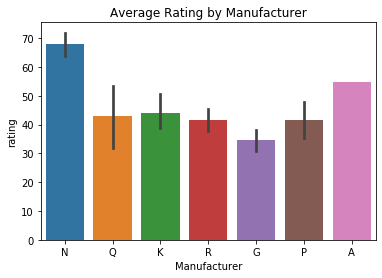

In [6]:
sns.barplot(x=df.mfr,y=df.rating)
plt.xlabel('Manufacturer')
plt.title('Average Rating by Manufacturer')

Text(0.5, 1.0, 'Rating vs. Sugars')

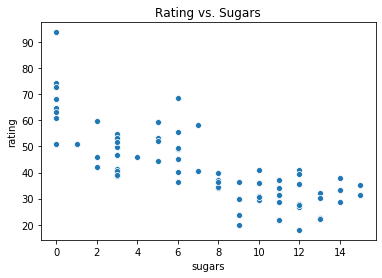

In [36]:
sns.scatterplot(x='sugars', y='rating', data=df)
plt.title('Rating vs. Sugars')

In [37]:
cc_sugar = scipy.stats.pearsonr(x=df.sugars,y=df.rating)
print("The Pearson's Correlation Coefficient for Sugars and Rating : " + str(cc_sugar[0]))

The Pearson's Correlation Coefficient for Sugars and Rating : -0.7617324153134106


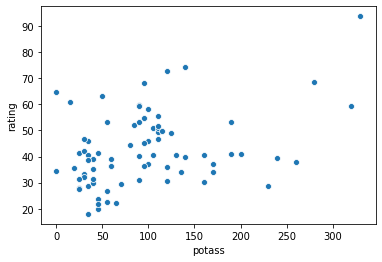

In [38]:
sns.scatterplot(x=df.potass,y=df.rating)

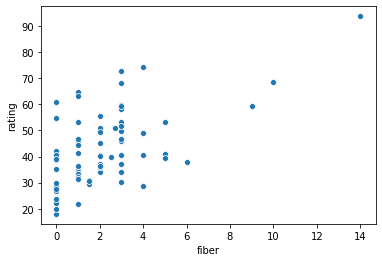

In [10]:
sns.scatterplot(x=df.fiber,y=df.rating)

Text(0.5, 1.0, 'Rating vs. Calories')

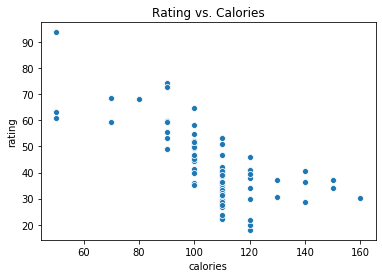

In [11]:
sns.scatterplot(x='calories', y='rating', data=df)
plt.title('Rating vs. Calories')

In [12]:
cc_cal = scipy.stats.pearsonr(x=df.calories,y=df.rating)
print("The Pearson's Correlation Coefficient for Calories and Rating : " + str(cc_cal[0]))

The Pearson's Correlation Coefficient for Calories and Rating : -0.6893760311652586


Text(0.5, 1.0, 'Rating vs. Vitamins')

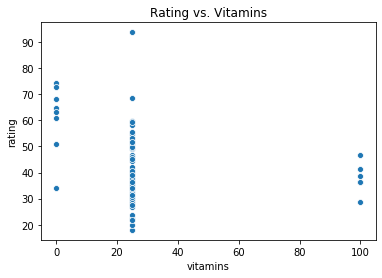

In [13]:
sns.scatterplot(x='vitamins', y='rating', data=df)
plt.title('Rating vs. Vitamins')

Text(0.5, 1.0, 'Ratings Distribution')

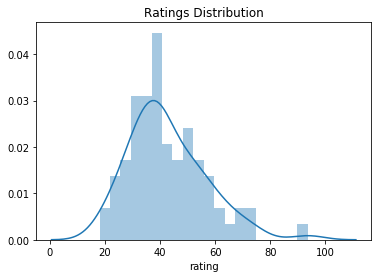

In [14]:
sns.distplot( df['rating'], bins=20 )
plt.title('Ratings Distribution')

In [15]:
shelf_1 = df[df.shelf == 1]
shelf_2 = df[df.shelf == 2]
shelf_3 = df[df.shelf == 3]

Text(0.5, 1.0, 'Ratings Distributions by Shelf')

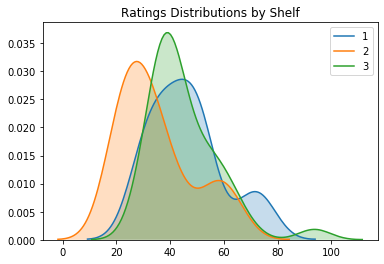

In [39]:
sns.kdeplot(shelf_1.rating, shade=True, label='1')
sns.kdeplot(shelf_2.rating, shade=True, label='2')
sns.kdeplot(shelf_3.rating, shade=True, label='3')
plt.title('Ratings Distributions by Shelf')

In [17]:
def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

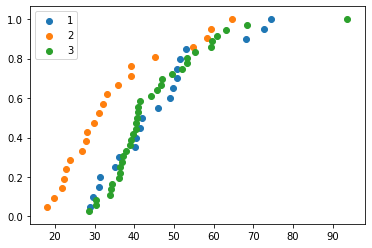

In [18]:
x,y = ecdf(shelf_1.rating)
plt.scatter(x=x, y=y)
x,y = ecdf(shelf_2.rating)
plt.scatter(x=x, y=y)
x,y = ecdf(shelf_3.rating)
plt.scatter(x=x, y=y)
plt.legend(['1','2','3'])

In [19]:
df.cups.value_counts()

1.00    30
0.75    16
0.67    13
0.50     7
0.33     3
0.88     2
0.80     1
1.13     1
1.33     1
1.50     1
0.25     1
1.25     1
Name: cups, dtype: int64

Text(0.5, 0, 'Cups')

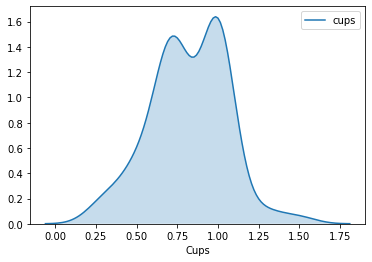

In [20]:
sns.kdeplot(df.cups, shade=True)
plt.xlabel('Cups')

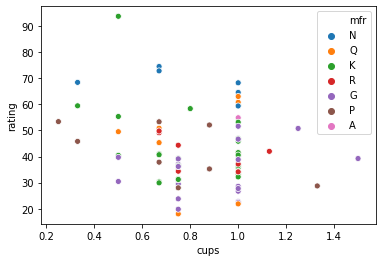

In [21]:
sns.scatterplot(x=df.cups,y=df.rating,hue=df.mfr)

In [22]:
df.vitamins.value_counts()

25     63
0       8
100     6
Name: vitamins, dtype: int64

In [23]:
high_vitamin = df[df.vitamins == 100]

In [24]:
high_vitamin.rating.mean()

38.098351666666666

In [25]:
df.rating.mean()

42.66570498701299

In [43]:
df.sodium.std()

83.83229524009317

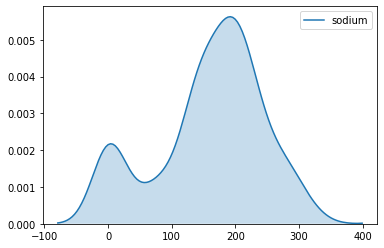

In [44]:
sns.kdeplot(df.sodium, shade=True)

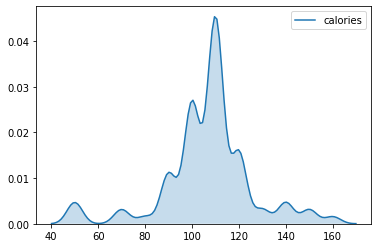

In [41]:
sns.kdeplot(df.calories, shade=True)

In [4]:
codes, uniques = pd.factorize(df.mfr)

NameError: name 'df' is not defined